# Pose Detection with OpenPose

This notebook uses an open source project [CMU-Perceptual-Computing-Lab/openpose](https://github.com/CMU-Perceptual-Computing-Lab/openpose.git) to detect/track multi person poses on a given youtube video.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install OpenPose

In [27]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
from IPython.display import YouTubeVideo

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- GCC detected, adding compile flags
-- GCC detected, adding compile flags
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Looking for pthread_create in pthread - found
-- Found Threa

## Detect poses on a test video

We are going to detect poses on the following youtube video:

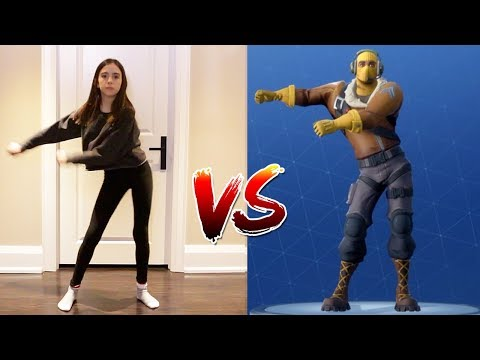

In [31]:
YOUTUBE_ID = 'RXABo9hm8B8'     # RXABo9hm8B8, 117tbp9RtlU

YouTubeVideo(YOUTUBE_ID)

Download the above youtube video, cut the first 5 seconds and do the pose detection on that 5 seconds:

In [32]:
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 5 video.mp4
# detect poses on the these 5 seconds
!rm openpose.avi
!cd openpose && ./build/examples/openpose/openpose.bin --video ../video.mp4 --write_json ./output/ --display 0  --write_video ../openpose.avi
# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose.avi output.mp4

[youtube] RXABo9hm8B8: Downloading webpage
[download] Destination: youtube.mp4
[download] 100% of 116.25MiB in 00:02
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis

Finally, visualize the result:

In [33]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

# Vid2vid

In [ ]:
!pip install dominate requests

In [6]:
!pip3 uninstall torch

Uninstalling torch-1.7.0+cu101:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/lib/python3.6/dist-packages/caffe2/*
    /usr/local/lib/python3.6/dist-packages/torch-1.7.0+cu101.dist-info/*
    /usr/local/lib/python3.6/dist-packages/torch/*
Proceed (y/n)? y
  Successfully uninstalled torch-1.7.0+cu101


In [7]:
!pip install torch===1.4.0 torchvision===0.5.0 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 39.9MB/s 
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [8]:
!pip install numpy==1.17.1

     |████████████████████████████████| 20.4MB 7.0MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


In [1]:
import numpy
numpy.version.version

'1.17.1'

In [2]:
!git clone https://github.com/NVlabs/few-shot-vid2vid

Cloning into 'few-shot-vid2vid'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 359 (delta 38), reused 58 (delta 30), pack-reused 272
Receiving objects: 100% (359/359), 61.23 MiB | 14.05 MiB/s, done.
Resolving deltas: 100% (159/159), done.


In [3]:
cd few-shot-vid2vid

/content/few-shot-vid2vid


In [4]:
!python scripts/download_datasets.py

In [5]:
!python3 scripts/download_flownet2.py

running install
running bdist_egg
running egg_info
creating correlation_cuda.egg-info
writing correlation_cuda.egg-info/PKG-INFO
writing dependency_links to correlation_cuda.egg-info/dependency_links.txt
writing top-level names to correlation_cuda.egg-info/top_level.txt
writing manifest file 'correlation_cuda.egg-info/SOURCES.txt'
writing manifest file 'correlation_cuda.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_ext
building 'correlation_cuda' extension
creating build
creating build/temp.linux-x86_64-3.6
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/torch/include -I/usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include -I/usr/local/lib/python3.6/dist-packages/torch/include/TH -I/usr/local/lib/python3.6/dist-packages/torch/include/THC -I/usr/local

In [6]:
!git clone https://github.com/NVIDIA/apex

Cloning into 'apex'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 7865 (delta 7), reused 8 (delta 0), pack-reused 7835
Receiving objects: 100% (7865/7865), 13.98 MiB | 8.41 MiB/s, done.
Resolving deltas: 100% (5356/5356), done.


In [7]:
!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./apex

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-0n0gdt5z
Created temporary directory: /tmp/pip-req-tracker-3b9pl33q
Created requirements tracker '/tmp/pip-req-tracker-3b9pl33q'
Created temporary directory: /tmp/pip-install-f48i_se0
Processing ./apex
  Created temporary directory: /tmp/pip-req-build-nwgr7d8k
  Added file:///content/few-shot-vid2vid/apex to build tracker '/tmp/pip-req-tracker-3b9pl33q'
    Running setup.py (path:/tmp/pip-req-build-nwgr7d8k/setup.py) egg_info for package from file:///content/few-shot-vid2vid/apex
    Running command python setup.py egg_info


    torch.__version__  = 1.4.0


    running egg_info
    creating /tmp/pip-req-build-nwgr7d8k/pip-egg-info/apex.egg-info
    writing /tmp/pip-req-build-nwgr7d8k/pip-egg-

In [22]:
!python train.py --name pose --dataset_mode fewshot_pose \
--adaptive_spade --warp_ref --spade_combine --remove_face_labels --add_face_D \
--niter_single 100 --niter 100 --batchSize 2

CustomDatasetDataLoader
2 sequences
dataset [PoseDataset] was created
create web directory ./checkpoints/pose/web...
---------- Networks initialized -------------
---------- Optimizers initialized -------------
model [Vid2VidModel] was created
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
(epoch: 1, iters: 100, time: 0.660) G_GAN: 0.773 G_GAN_Feat: 0.653 G_VGG: 6.186 Gf_GAN: 10.005 Gf_GAN_feat: 22.640 F_Flow: 0.670 F_Warp: 0.430 F_Mask: 4.479 D_real: 0.815 D_fake: 1.167 Df_real: 10.037 Df_fake: 9.941 
(epoch: 1, iters: 200, time: 0.503) G_GAN: 0.937 G_GAN_Feat: 0.771 G_VGG: 6.173 Gf_GAN: 9.861 Gf_GAN_feat: 23.810 F_Flow: 1.413 F_Warp: 0.823 F_Mask: 4.038 D_real: 0.947 D_fake: 1.

In [ ]:
!python test.py --name pose --dataset_mode fewshot_pose --adaptive_spade \
--warp_ref --spade_combine --remove_face_labels --finetune --seq_path [PATH_TO_SEQ] \
--ref_img_path [PATH_TO_REF_IMG]
